dataset :
https://media.geeksforgeeks.org/wp-content/uploads/20250402171822919100/credit-card-dataset.zip

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from keras.initializers import random_normal
from keras.constraints import max_norm
from keras.optimizers import SGD

In [33]:
df = pd.read_csv('/content/Credit_card.csv')
labels = pd.read_csv('/content/Credit_card_label.csv')

In [34]:
dep = 'Approved'

df[dep] = labels.label.astype(int)

df.loc[df[dep] == 1, 'Status'] = 'Approved'
df.loc[df[dep] == 0, 'Status'] = 'Declined'

In [35]:
cats = [
    'GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income',
    'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone',
    'Work_Phone', 'Phone', 'Type_Occupation', 'EMAIL_ID'
]

conts = [
    'CHILDREN', 'Family_Members', 'Annual_income',
    'Age', 'EmployedDaysOnly', 'UnemployedDaysOnly'
]
def proc_data():
    df['Age'] = -df.Birthday_count // 365
    df['EmployedDaysOnly'] = df.Employed_days.apply(lambda x: x if x > 0 else 0)
    df['UnemployedDaysOnly'] = df.Employed_days.apply(lambda x: abs(x) if x < 0 else 0)

    for cat in cats:
        df[cat] = pd.Categorical(df[cat])

    modes = df.mode().iloc[0]
    df.fillna(modes, inplace=True)

proc_data()

In [36]:
y.value_counts()

,count
Approved,
0,1373
1,175


In [37]:
X = df[cats + conts]
y = df[dep]
X_over, y_over = RandomOverSampler().fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_over, y_over, test_size=0.25)

In [38]:
X_train[cats] = X_train[cats].apply(lambda x: x.cat.codes)
X_val[cats] = X_val[cats].apply(lambda x: x.cat.codes)

How can we identify the problem?

Identifying the presence of exploding gradients in deep neural network requires careful observation and analysis during training. Here are some key indicators:

The loss function exhibits erratic behavior, oscillating wildly instead of steadily decreasing suggesting that the network weights are being updated excessively by large gradients, preventing smooth convergence.

The training process encounters "NaN" (Not a Number) values in the loss function or other intermediate calculations..

If network weights, during training exhibit significant and rapid increases in their values, it suggests the presence of exploding gradients.
Tools like TensorBoard can be used to visualize the gradients flowing through the network.

How can we solve the issue?

Gradient Clipping: It sets a maximum threshold for the magnitude of gradients during backpropagation. Any gradient exceeding the threshold is clipped to the threshold value, preventing it from growing unbounded.

Batch Normalization: This technique normalizes the activations within each mini-batch, effectively scaling the gradients and reducing their variance. This helps prevent both vanishing and exploding gradients, improving stability and efficiency.


In [39]:
model = Sequential()

In [40]:
model = Sequential()

model.add(Dense(10, activation='tanh', kernel_initializer=random_normal(mean=0.0, stddev=1.0), input_dim=18))
model.add(Dense(10, activation='tanh', kernel_initializer=random_normal(mean=0.0, stddev=1.0)))
model.add(Dense(10, activation='tanh', kernel_initializer=random_normal(mean=0.0, stddev=1.0)))
model.add(Dense(10, activation='tanh', kernel_initializer=random_normal(mean=0.0, stddev=1.0)))
model.add(Dense(10, activation='tanh', kernel_initializer=random_normal(mean=0.0, stddev=1.0)))
model.add(Dense(10, activation='tanh', kernel_initializer=random_normal(mean=0.0, stddev=1.0)))
model.add(Dense(10, activation='tanh', kernel_initializer=random_normal(mean=0.0, stddev=1.0)))
model.add(Dense(10, activation='tanh', kernel_initializer=random_normal(mean=0.0, stddev=1.0)))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
optimizer = SGD(learning_rate=1.0)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [42]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5196 - loss: 0.7995
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5165 - loss: 0.7402
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5170 - loss: 0.7174
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5368 - loss: 0.7023
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4954 - loss: 0.7274
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5141 - loss: 0.7121
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5128 - loss: 0.7077
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5039 - loss: 0.7285
Epoch 9/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4936 - loss: 0.7307
Epoch 10/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5130 - loss: 0.7170
Epoch 11/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5168 - loss: 0.7011
Epoch 12/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

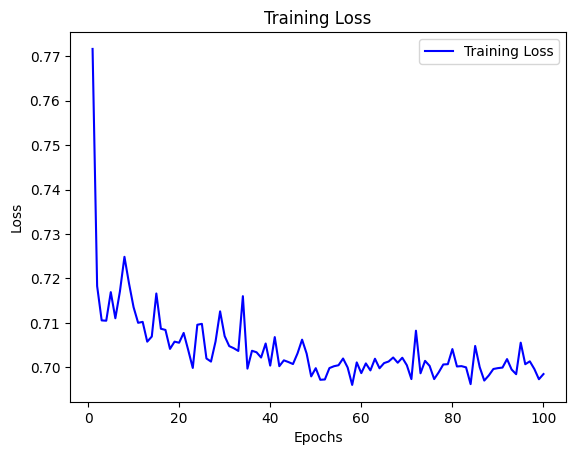

In [43]:
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Solution for Exploding Gradient Problem
Below methods can be used to modify the model:

Weight Initialization:
The weight initialization is changed to 'glorot_uniform,' which is a commonly used initialization for neural networks.

Gradient Clipping: The clipnorm parameter in the Adam optimizer is set to 1.0, which performs gradient clipping. This helps prevent exploding gradients.

Kernel Constraint: The max_norm constraint is applied to the kernel weights of each layer with a maximum norm of 2.0. This further helps in preventing exploding gradients.

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [47]:
model = Sequential()

model.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=max_norm(2.0), input_dim=18))
model.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=max_norm(2.0)))
model.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=max_norm(2.0)))
model.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=max_norm(2.0)))
model.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=max_norm(2.0)))
model.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=max_norm(2.0)))
model.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=max_norm(2.0)))
model.add(Dense(10, activation='tanh', kernel_initializer='glorot_uniform', kernel_constraint=max_norm(2.0)))
model.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001, clipnorm=1.0), metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled, y_val), batch_size=32, callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5336 - loss: 0.6922 - val_accuracy: 0.5677 - val_loss: 0.6786
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6114 - loss: 0.6718 - val_accuracy: 0.6215 - val_loss: 0.6582
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6130 - loss: 0.6624 - val_accuracy: 0.6332 - val_loss: 0.6446
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6367 - loss: 0.6358 - val_accuracy: 0.6143 - val_loss: 0.6290
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6444 - loss: 0.6286 - val_accuracy: 0.6317 - val_loss: 0.6190
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6563 - loss: 0.6069 - val_accuracy: 0.6507 - val_loss: 0.6013
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6774 - loss: 0.5789 - val_accuracy: 0.6754 - val_loss: 0.5915
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7091 - loss: 0.5669 - val_accuracy: 0.6856

In [50]:
predictions = model.predict(X_val_scaled )
rounded_predictions = np.round(predictions)
report = classification_report(y_val, rounded_predictions)
print(f'Classification Report:\n{report}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       331
           1       0.85      0.97      0.91       356

    accuracy                           0.90       687
   macro avg       0.91      0.90      0.90       687
weighted avg       0.91      0.90      0.90       687

